#Problem 2: Method of Lagrange Multipliers (15 pts)
Suppose that we modified the objective function in the SVM with slack formulation to be a quadratic
penalty instead of a linear penalty, that is minimize $\frac{1}{2}\Vert w\Vert^2 +c\sum_i \xi_i^2$ subject to the same constraints as the standard SVM with slack. What is the dual of this new quadratic penalized SVM with slack problem for a fixed c? Can the kernel trick still be applied?

Note that, the question asks for the same constraints as the standard SVM. However, since $\xi_i^2$ is always nonenegative, there is no need to add the constraint $\xi_i\geq 0$.

The problem is
\begin{align}
\min_{w, b, \xi} \frac{1}{2}\Vert w\Vert_2^2+c\sum_{i=1}^M\xi_i^2
\end{align}
$$\text{s.t.} \quad \forall i \quad y_i(w^\intercal x^{(i)}+b)\geq1-\xi_i \qquad\qquad$$
$$\xi_i \geq 0$$

By adding the constraints to the objective function, we construct the Lagrangian as
\begin{align}
L(w,b,\xi,\lambda,\mu) &= \frac{1}{2}\Vert w\Vert^2_2 + c\sum_{i=1}^M \xi_i^2 + \sum_{i=1}^M \lambda_i \left(1 - \xi_i - y_i(w^Tx^{(i)} + b)\right) - \sum_{i=1}^M \mu_i\xi_i\\
&= \frac{1}{2}\Vert w\Vert^2_2 + \sum_{i=1}^M \lambda_i \left(1 - y_i(w^Tx^{(i)} + b)\right)  + \sum_{i=1}^M \left(c\xi_i -  (\lambda_i + \mu_i )\right)\xi_i 
\end{align}

In order to minimize the Lagrangian with respect to primal variables, 
\begin{alignat}{2}
\frac{\partial L}{\partial w_k} &= w_{k}+\sum_{i=1}^M-\lambda_iy_{i}x_{k}^{(i)}=0 \quad&&\rightarrow w_k = \sum_{i=1}^M\lambda_iy_i x_k^{(i)},\\
\frac{\partial L}{\partial b} &= \sum_{i=1}^M-\lambda_iy_i=0 &&\rightarrow \sum_{i=1}^M\lambda_iy_i = 0,\\
\frac{\partial L}{\partial \xi_k} &= 2c\xi_k-\lambda_k-\mu_k=0 &&\rightarrow \xi_k = \frac{\lambda_k + \mu_k}{2c}
\end{alignat}

Using the newly obtained constraints, the dual problem is
\begin{align}
\max_{\lambda,\mu}-\frac{1}{2}\sum_{i=1}^M\sum_{j=1}^M\lambda_i\lambda_jy_iy_jx_i^Tx_j + \sum_{i=1}^M\lambda_{i} -\frac{1}{4c} \sum_{i=1}^M (\lambda_i + \mu_i)^2
\end{align}
such that 
$$\lambda_i\geq 0,$$
$$\mu_i \geq 0,$$
$$\sum_{i=1}^M\lambda_iy_{i}=0.$$


And yes, we can still utilize the Kernel trick. 

#Problem 3: Poisonous Mushrooms? (25 pts)
For this problem, you will use the mushroom data set provided with this problem set. The data has
been divided into two pieces mush train.data and mush test.data. These data sets were generated
using the UCI Mushroom data set (follow the link for information about the format of the data).
Note that the class label is the first column in the data set.

In [ ]:
import pandas as pd
import numpy as np

!wget -nc https://personal.utdallas.edu/~shahab.shams/files/ML_Spring_2021/mush_test.data
!wget -nc https://personal.utdallas.edu/~shahab.shams/files/ML_Spring_2021/mush_train.data


mush_train =  pd.read_csv('mush_train.data', sep=",",header= None)
print(mush_train)
mush_train = mush_train.to_numpy()
X_mtrain = mush_train[:,1:]
print(X_mtrain.shape)
Y_mtrain = mush_train[:,0]

mush_test =  pd.read_csv('mush_test.data', sep=",",header= None)
mush_test = mush_test.to_numpy()
X_mtest = mush_test[:,1:]
Y_mtest = mush_test[:,0]

--2021-03-31 14:05:18--  https://personal.utdallas.edu/~shahab.shams/files/ML_Spring_2021/mush_test.data
Resolving personal.utdallas.edu (personal.utdallas.edu)... 129.110.182.249
Connecting to personal.utdallas.edu (personal.utdallas.edu)|129.110.182.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160364 (157K)
Saving to: ‘mush_test.data’

mush_test.data      100%[===================>] 156.61K   162KB/s    in 1.0s    

2021-03-31 14:05:23 (162 KB/s) - ‘mush_test.data’ saved [160364/160364]

--2021-03-31 14:05:23--  https://personal.utdallas.edu/~shahab.shams/files/ML_Spring_2021/mush_train.data
Resolving personal.utdallas.edu (personal.utdallas.edu)... 129.110.182.249
Connecting to personal.utdallas.edu (personal.utdallas.edu)|129.110.182.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221464 (216K)
Saving to: ‘mush_train.data’

mush_train.data     100%[===================>] 216.27K   225KB/s    in 1.0s    

2021-03-31 14:05:

1. Assuming you break ties using the attribute that occurs last (left to right) in the data, draw
the resulting decision tree and report the maximum information gain for each node that you
added to the tree.

\begin{align}
\text{H}(Y) = - \sum_{y} p(Y = y)\log p(Y = y)
\end{align}

\begin{align}
\text{H}(Y|X) = - \sum_{x} p(X = x)\sum_{y}p(Y=y|X=x)\log p(Y=y|X=x)
\end{align}

$$\text{IG}(X) = \text{H}(Y) - \text{H}(Y|X)$$

In [ ]:
import math

class node():
  def __init__(self,X,Y,parent,auto_branch = True,branched_at = None):
    self.X = X
    self.Y = Y
    self.parent = parent
    self.auto_branch = auto_branch
    
    if len(set(Y)) == 1:
      self.leaf = True
      self.label = Y[0]
    else:
      self.leaf = False
      self.label = 'not a leaf'

    self.child = []
    self.IG = 0
    self.branched_at = branched_at

    if (parent == None or auto_branch) and (not self.leaf):
      self.branch()

  def cond_entropy(self,xi):
    H_YX = 0
    for c in set(self.X[:,xi]):
      Y_c = self.Y[np.where(self.X[:,xi] == c)]
      e = len(np.where(Y_c == 'e')[0])/Y_c.shape[0]
      p = len(np.where(Y_c == 'p')[0])/Y_c.shape[0]
      H_YX -= (Y_c.shape[0]/self.Y.shape[0]) * (math.log(e**e) + math.log(p**p))

    return H_YX

  def branch(self):

    e = len(np.where(self.Y == 'e')[0])/self.Y.shape[0]
    p = len(np.where(self.Y == 'p')[0])/self.Y.shape[0]
    H_Y = - (math.log(e**e) + math.log(p**p))
    
    if self.branched_at == None:
      max_gain = 0
      for xi in range(self.X.shape[1]):

        H_YX = self.cond_entropy(xi)
        IG = H_Y - H_YX
        if (IG > max_gain) or (IG == max_gain and self.branched_at < xi): # breaks ties
          max_gain = IG
          self.branched_at = xi
    else:
      max_gain = H_Y - self.cond_entropy(self.branched_at)

    self.IG = max_gain
    self.label = 'IG=' + str(np.round(max_gain,3)) + '\n at '+str(self.branched_at)

    for c in set(self.X[:,self.branched_at]):
      X_c = self.X[np.where(self.X[:,self.branched_at] == c)[0],:]
      Y_c = self.Y[np.where(self.X[:,self.branched_at] == c)[0]]
      new_node = node(X_c,Y_c,self,self.auto_branch)
      self.child.append(new_node)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

def plot_tree(main_node,index,dim):

  def dfs(mnode,pre_index):
    for node in mnode.child:
      index = node.label
      if index in {'e','p'}:
        index =  str(mnode.branched_at) +  node.X[0,mnode.branched_at] + '->' + index
      else:
        index =  str(mnode.branched_at) +  node.X[0,mnode.branched_at] + '\n'+ index


      Graph.add_node(index)
      Graph.add_edge(pre_index,index)
      dfs(node,index)
  
  Graph = nx.DiGraph()
  Graph.add_node(main_node.label)
  dfs(main_node,index)
  pos = graphviz_layout(Graph, prog="dot")
  plt.figure(figsize=dim)
  nx.draw(Graph, pos,with_labels = True,font_weight="bold", node_color="skyblue", alpha=1,node_size=1500)
  plt.show()

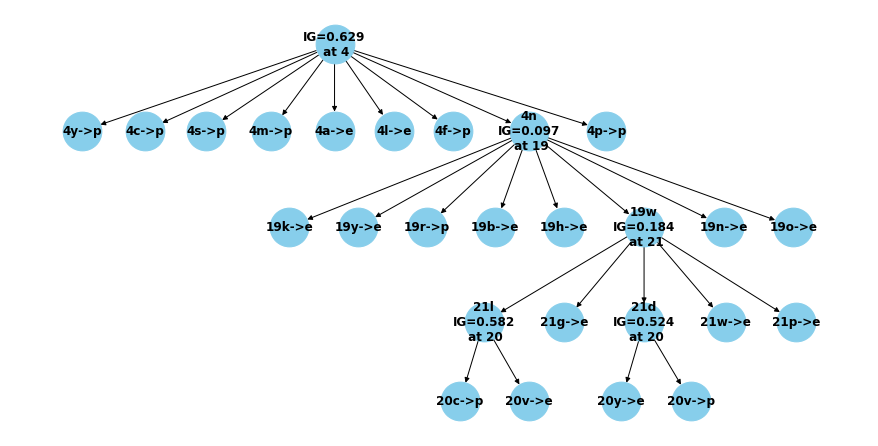

In [ ]:
main_node = node(X_mtrain,Y_mtrain,None)

plot_tree(main_node,main_node.label,[12,6])

2. What is the accuracy of this decision tree on the test data?

In [ ]:
def test(X,Y,main_node):
  Y_pred = []

  for i in range(X.shape[0]):
    cur_node = main_node
    while True:
      if cur_node.label in set(Y_mtrain):
        Y_pred.append(cur_node.label)
        break
      else:
        flag = 0
        for node in cur_node.child:
          check = list(set(node.X[:,cur_node.branched_at]))[0]
          if X[i,cur_node.branched_at] == check :
            cur_node = node
            flag = 1
            break
        if flag == 0:
          Y_pred.append('Not Found')
          break

  acc = 100 * np.sum(Y == Y_pred) / Y.shape[0]
  print( 'Accuracy on the test set is \033[1m%d percent\033[0m.'%(acc ) )
  return acc

In [ ]:
test(X_mtest,Y_mtest,main_node);

Accuracy on the test set is 100 percent.


3. Now consider arbitrary input data. Suppose that you decide to limit yourself to decision
trees of height one, i.e., only one split. Is the tree produced by the information gain heuristic
optimal on the training data (that is, no other decision tree has higher accuracy)?

Branch at  0: Accuracy on the test set is 56 percent.
Branch at  1: Accuracy on the test set is 58 percent.
Branch at  2: Accuracy on the test set is 59 percent.
Branch at  3: Accuracy on the test set is 74 percent.
Branch at  4: Accuracy on the test set is 98 percent.
Branch at  5: Accuracy on the test set is 51 percent.
Branch at  6: Accuracy on the test set is 61 percent.
Branch at  7: Accuracy on the test set is 75 percent.
Branch at  8: Accuracy on the test set is 80 percent.
Branch at  9: Accuracy on the test set is 55 percent.
Branch at  10: Accuracy on the test set is 63 percent.
Branch at  11: Accuracy on the test set is 77 percent.
Branch at  12: Accuracy on the test set is 76 percent.
Branch at  13: Accuracy on the test set is 71 percent.
Branch at  14: Accuracy on the test set is 72 percent.
Branch at  15: Accuracy on the test set is 51 percent.
Branch at  16: Accuracy on the test set is 52 percent.
Branch at  17: Accuracy on the test set is 54 percent.
Branch at  18: Accur

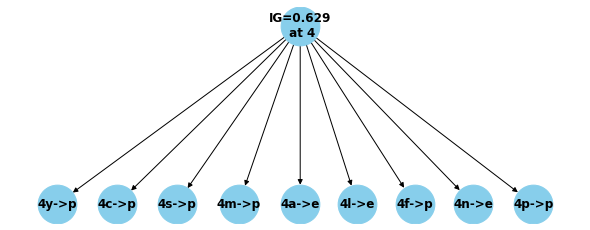

In [ ]:
max_acc = 0
max_c = -1
max_node = None
for b in range(X_mtrain.shape[1]):
  one_node = node(X_mtrain,Y_mtrain,None,auto_branch=False,branched_at=b)
  for c in range(len(one_node.child)):
    if one_node.child[c].label not in {'e','p'}:
      es = sum(one_node.child[c].Y == 'e')
      ps = sum(one_node.child[c].Y == 'p')
      if es >= ps:
        one_node.child[c].label = 'e'
      else:
        one_node.child[c].label = 'p'

  print('Branch at ',b,end = ': ')
  acc = test(X_mtest,Y_mtest,one_node);
  if max_acc < acc:
    max_acc = acc
    max_c = c
    max_node = one_node
plot_tree(max_node,max_node.label,[8,3])